In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [99]:
# Load data
description_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/description.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(description_data.head())
print(description_data.shape)


<ipython-input-99-1b5ee4aab214>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  description_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/description.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,Train data:,None,None,None
1,ID,TITLE,GENRE,DESCRIPTION
2,ID,TITLE,GENRE,DESCRIPTION
3,ID,TITLE,GENRE,DESCRIPTION
4,ID,TITLE,GENRE,DESCRIPTION


(12, 4)


In [100]:
train_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


<ipython-input-100-5153cccff94e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [101]:
test_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(test_data.head())
print(test_data.shape)

<ipython-input-101-f40d7b5d3149>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


In [102]:
test_solution_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(test_solution_data.head())
print(test_solution_data.shape)

<ipython-input-102-9072e2785eb5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("/content/drive/MyDrive/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


In [103]:
# Handle missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)


In [104]:
# TF-IDF vectorization
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

In [105]:
# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [106]:
# Train-test split
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [107]:
# Linear Support Vector Classification
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)
y_val_pred = clf.predict(X_val)
print("LinearSVC Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("LinearSVC Validation Classification Report:\n", classification_report(y_val, y_val_pred))

LinearSVC Validation Accuracy: 0.5836945494789265
LinearSVC Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0

In [108]:
# Multinomial Naive Bayes
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)
y_pred_mnb = Mnb_classifier.predict(X_test)
print("Multinomial Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Multinomial Naive Bayes Test Classification Report:\n", classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Test Accuracy: 0.2511439114391144
Multinomial Naive Bayes Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Test Classification Report:\n", classification_report(y_test, y_pred_lr))






Logistic Regression Test Accuracy: 0.2511439114391144
Logistic Regression Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    labels = sorted(set(y_true) | set(y_pred))  # Get unique labels from both y_true and y_pred
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



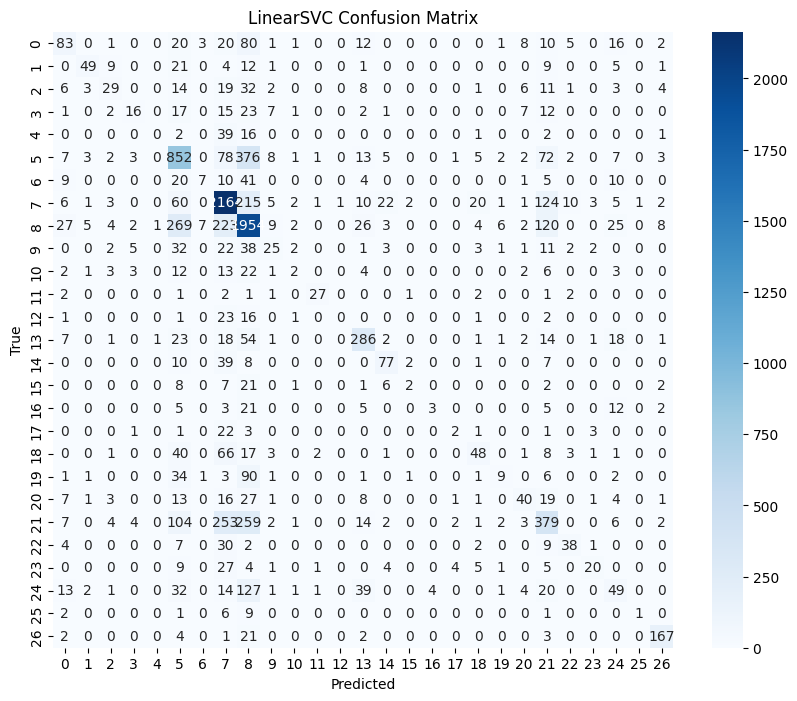

In [111]:
# Plot Confusion Matrix for LinearSVC
plot_confusion_matrix(y_val, y_val_pred, title='LinearSVC Confusion Matrix')



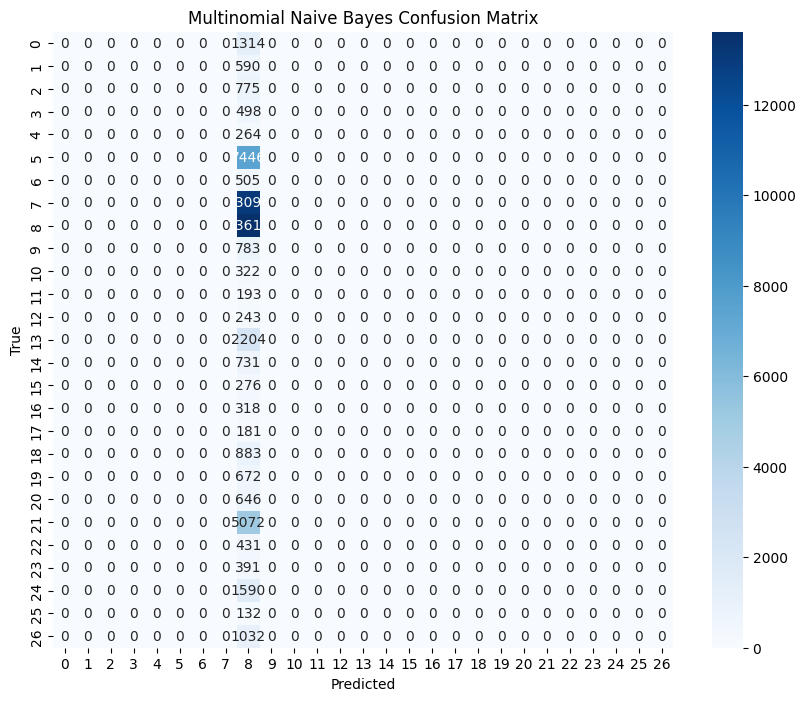

In [112]:

# Plot Confusion Matrix for Multinomial Naive Bayes
plot_confusion_matrix(y_test, y_pred_mnb, title='Multinomial Naive Bayes Confusion Matrix')



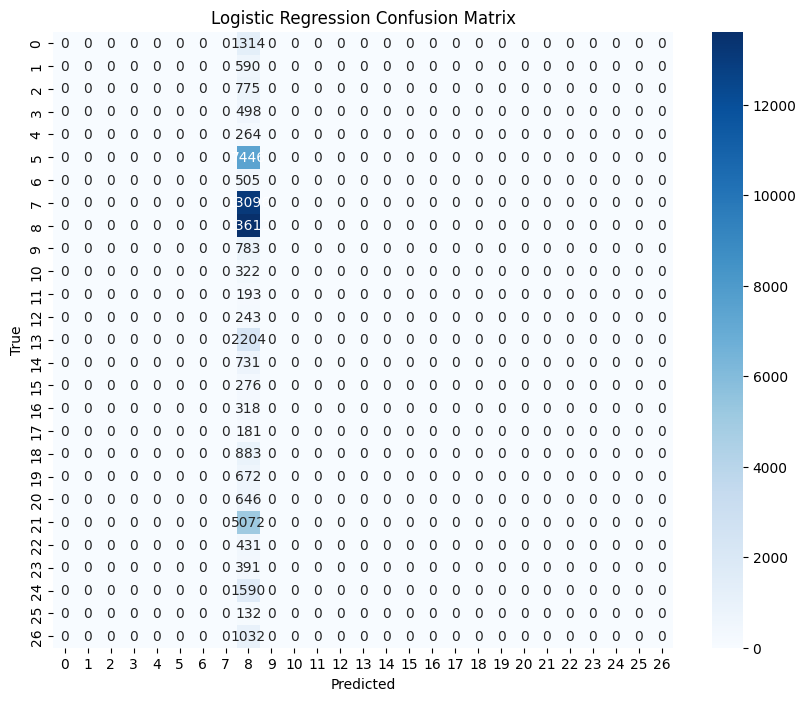

In [113]:
# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')



In [114]:
# Function to plot bar chart for accuracy comparison
def plot_accuracy_comparison(accuracies, labels):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.show()


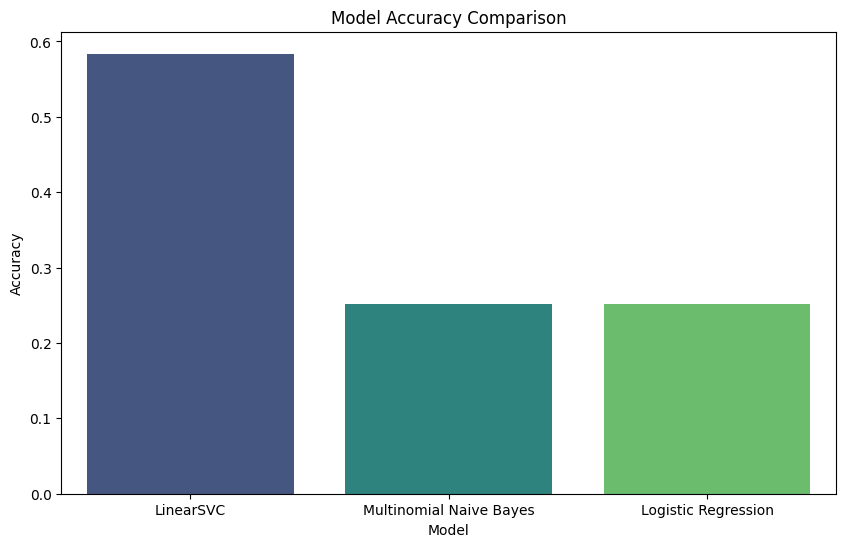

In [115]:


# Compare accuracies of different models
accuracies = [accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_pred_mnb), accuracy_score(y_test, y_pred_lr)]
model_labels = ['LinearSVC', 'Multinomial Naive Bayes', 'Logistic Regression']
plot_accuracy_comparison(accuracies, model_labels)

In [117]:
# Function to predict movie genre
def predict_movie(description, model, vectorizer, encoder):
    description_vectorized = vectorizer.transform([description])
    pred_label = model.predict(description_vectorized)
    return encoder.inverse_transform(pred_label)[0]

# Example usage
sample_1 = "A ruthless youngster becomes a kind and humble husband for his wife but as fate turns brutal, his patience is tested."
print("sample_1",predict_movie(sample_1, lr_classifier, t_v, label_encoder))

sample_2 = "After Captain Murphy lost some of his men on his last mission to Mexico to bring back a US Senator, he has been plagued with unhappiness and bad dreams. When Murphy is given orders to go back to Mexico to help Mexican people slaving for Salvatore, a rich drug dealer, he must use a new technology plane to get there. The plane is technically advanced with a new protection luxury called ‘Active Stealth’. Murphy and his men get aboard the ‘Active Stealth’, piloted by Hollywood who dreams of being an actor and embark to Mexico. The action never stops from then on when Salvatore sends his men in to block them from getting through."
print("sample_2",predict_movie(sample_2, Mnb_classifier, t_v, label_encoder))

sample_3 = "A boy swallows a cursed talisman – the finger of a demon – and becomes cursed himself. He enters a shaman’s school to be able to locate the demon’s other body parts and thus exorcise himself.."
print("sample_3",predict_movie(sample_3, lr_classifier, t_v, label_encoder))

sample_4 = "Soorma, a comeback story of the hockey legend Sandeep Singh is a biopic that chronicles the life and times of the famed hockey player."
print("sample_4",predict_movie(sample_4, lr_classifier, t_v, label_encoder))

sample_5 = "Carly gets a second chance at romance with her college crush but isn’t sure how to impress him until her new friend Nick starts giving her advice. Soon she learns who the right man for her really is."
print("sample_5",predict_movie(sample_5, lr_classifier, t_v, label_encoder))

sample_6 = "In the city of Khansaar, Raja Mannar plans to make his son, Vardharaja Mannar his successor, but Raja Mannar’s ministers and advisors plan a coup d’état by hiring armies from Russia and Serbia to attack and kill Vardha and Raja. Vardha, along with his brother and a few trusted men, manage to escape from Khansaar. Vardha goes to his childhood best friend, Deva, who learns about his predicament and sets out to make him the undisputed successor of Khansaa"
print("sample_6",predict_movie(sample_6, lr_classifier, t_v, label_encoder))

sample_7 = "Three mysterious figures emerge from the Mojave Desert and make their way to Los Angeles, leaving a trail of bodies in their path."
print("sample_7",predict_movie(sample_7, lr_classifier, t_v, label_encoder))

sample_8 = "Upon receiving a mysterious letter that her mother’s grave has been vandalized, Marie travels to the desolate island town where she’s buried. Just as she arrives, the island closes for the season, leaving Marie trapped in a nightmare.."
print("sample_8",predict_movie(sample_8, lr_classifier, t_v, label_encoder))

sample_9 = "The story of J. Robert Oppenheimer’s role in the development of the atomic bomb during World War II."
print("sample_9",predict_movie(sample_9, lr_classifier, t_v, label_encoder))

sample_10 = "Two couples from different generations confront their issues after marriage.."
print("sample_10",predict_movie(sample_10, lr_classifier, t_v, label_encoder))



sample_1  drama 
sample_2  drama 
sample_3  horror 
sample_4  documentary 
sample_5  comedy 
sample_6  comedy 
sample_7  short 
sample_8  drama 
sample_9  documentary 
sample_10  drama 
